# torch basic

In [1]:
!pip3 install torch numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


## tensor

In [2]:
import torch

x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [3]:
# 랭크 늘리기
x = torch.unsqueeze(x, 1) # 인덱스는 앞부터 0, 1, 2, -1(마지막 차원)
#x = x.unsqueeze(0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
Size: torch.Size([3, 1, 3])
Shape: torch.Size([3, 1, 3])
랭크(차원): 3


In [4]:
# 랭크 줄이기
x = torch.squeeze(x) # 크기가 1인 차원을 모두 제거한다
#x = x.squeeze()
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [5]:
import torch
import numpy as np

array = [[1,2], [3, 4]]
x = torch.tensor(array)
print(x)
#x = torch.from_numpy(array)
x = torch.LongTensor(array)
print(x)
x = torch.Tensor(array)
print(x)
x = torch.FloatTensor(array)
print(x)
x = np.array([[1,2], [3, 4]])
print(x)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
[[1 2]
 [3 4]]


## view

In [6]:
x = torch.randint(1, 10, size=(3,3))
print(x.shape)

torch.Size([3, 3])


In [7]:
print(x)

tensor([[1, 2, 9],
        [4, 4, 8],
        [7, 3, 7]])


In [18]:
x = x.view(-1, 3, 3, 1, 1, 1)
print(x.ndimension())

6


In [19]:
print(x)
print(x.shape)

tensor([[[[[[1]]],


          [[[2]]],


          [[[9]]]],



         [[[[4]]],


          [[[4]]],


          [[[8]]]],



         [[[[7]]],


          [[[3]]],


          [[[7]]]]]])
torch.Size([1, 3, 3, 1, 1, 1])


In [20]:
print('x.view(2,4)')
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

x.view(2,4)
shape '[2, 4]' is invalid for input of size 9


In [21]:
print('x.view(1,9)')
try:
    x = x.view(1,9)
    print(x)
except Exception as e:
    print(e) #에러 출력
    
print('x.view(1,-1)')
try:
    x = x.view(1,-1)
    print(x)
except Exception as e:
    print(e) #에러 출력
    
print('x.view(-1,1)')
try:
    x = x.view(-1,1)
    print(x)
except Exception as e:
    print(e) #에러 출력

x.view(1,9)
tensor([[1, 2, 9, 4, 4, 8, 7, 3, 7]])
x.view(1,-1)
tensor([[1, 2, 9, 4, 4, 8, 7, 3, 7]])
x.view(-1,1)
tensor([[1],
        [2],
        [9],
        [4],
        [4],
        [8],
        [7],
        [3],
        [7]])


## requires_grad

In [22]:
import torch

x = torch.FloatTensor(2, 2)
y = torch.FloatTensor(2, 2)

y.requires_grad_(True) # 향후 gradient를 계산하기 위해 이 tensor가 포함된 모든 연산을 추적(track)한다
z = ( x + y ) + torch.Tensor(2, 2)
print(z)

tensor([[8.5660e+01, 9.2339e-41],
        [8.8657e+01, 4.0000e+00]], grad_fn=<AddBackward0>)


In [23]:
import torch

x = torch.FloatTensor(2, 2)
y = torch.FloatTensor(2, 2)

y.requires_grad_(True) # leaf node, 역전파로 계산된 grad이 최종 저장됨
with torch.no_grad(): # 이 연산은 추적하지 않는다
    z = ( x + y ) + torch.Tensor(2, 2)
print(z)

tensor([[5.1372e+17, 6.1569e-41],
        [6.3938e+36, 1.0729e-40]])


In [26]:
import torch

w = torch.tensor(2.0, requires_grad=True)
w

tensor(2., requires_grad=True)

In [27]:
a = w*3 # 3 
l = a**2 # 9
print(l)
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(36., grad_fn=<PowBackward0>)
tensor(36.)
l을 w로 미분한 값은 36.0


In [28]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


In [29]:
w = torch.tensor(-1.0, requires_grad=True)
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(-18.)
l을 w로 미분한 값은 -18.0


In [30]:
w = torch.tensor(-2.0, requires_grad=True)
a = w*3 # 3 
l = a**2 # 9
l.backward() # l = (w*3)^2 = 9w^2
print(w.grad) # 미분하면 9 * 2w = 18w
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(-36.)
l을 w로 미분한 값은 -36.0


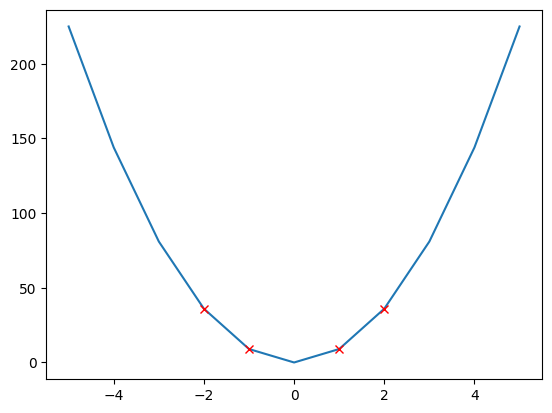

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [a for a in range(-5, 6)]
y = [9 * (b * b) for b in range(-5, 6)]

plt.plot(x, y) # 전체 값의 그래프
for i in [-2, -1, 1, 2]:
    plt.plot(i, 9 * (i*i), 'rx')
plt.show()

tensor(-36.)
tensor(-29.5200)
tensor(-24.2064)
tensor(-19.8492)
tensor(-16.2764)
tensor(-13.3466)
tensor(-10.9442)
tensor(-8.9743)
tensor(-7.3589)
tensor(-6.0343)
tensor(-4.9481)
tensor(-4.0575)
tensor(-3.3271)
tensor(-2.7282)
tensor(-2.2372)
tensor(-1.8345)
tensor(-1.5043)
tensor(-1.2335)
tensor(-1.0115)
tensor(-0.8294)


/tmp/ipykernel_10620/2537356315.py:17: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(float(px), float(py), 'rx')


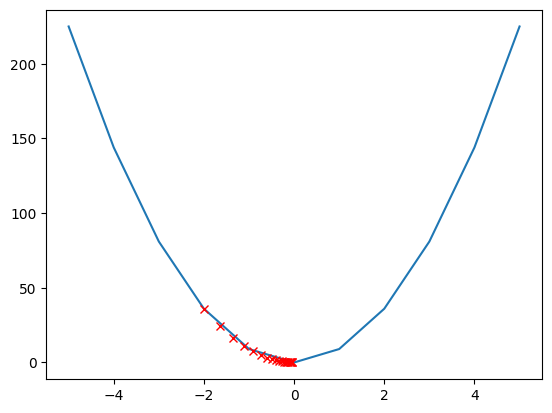

In [32]:
# 임의의 x로부터 y가 최소화 되는 위치를 찾는다. 통상 ML에서 x는 param, y는 loss이다.

import matplotlib.pyplot as plt

w = 9
lr = 0.01
x = [a for a in range(-5, 6)]
y = [w * (b * b) for b in range(-5, 6)]

plt.plot(x, y) # 전체 값의 그래프

px = torch.tensor(-2.0)

for i in range(20):
    px.requires_grad = True
    py = w * (px * px)
    plt.plot(float(px), float(py), 'rx')
    py.backward()
    grad = px.grad
    print(grad)
    with torch.no_grad():
        px = px - grad * lr

tensor(81.)
tensor(66.4200)
tensor(54.4644)
tensor(44.6608)
tensor(36.6219)
tensor(30.0299)
tensor(24.6245)
tensor(20.1921)
tensor(16.5575)
tensor(13.5772)
tensor(11.1333)
tensor(9.1293)
tensor(7.4860)
tensor(6.1385)
tensor(5.0336)
tensor(4.1276)
tensor(3.3846)
tensor(2.7754)
tensor(2.2758)
tensor(1.8662)


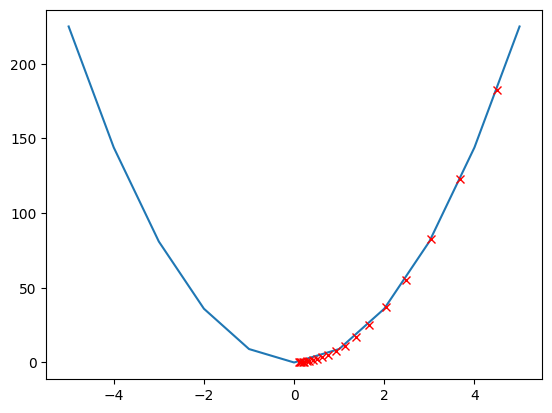

In [33]:
# 임의의 x로부터 y가 최소화 되는 위치를 찾는다. 통상 ML에서 x는 param, y는 loss이다.

import matplotlib.pyplot as plt

w = 9
lr = 0.01
x = [a for a in range(-5, 6)]
y = [w * (b * b) for b in range(-5, 6)]

plt.plot(x, y) # 전체 값의 그래프

px = torch.tensor(4.5)

for i in range(20):
    px.requires_grad = True
    py = w * (px * px)
    plt.plot(float(px), float(py), 'rx')
    py.backward()
    grad = px.grad
    print(grad)
    with torch.no_grad():
        px = px - grad * lr

tensor(36.)
tensor(29.5200)
tensor(24.2064)
tensor(19.8492)
tensor(16.2764)
tensor(13.3466)
tensor(10.9442)
tensor(8.9743)
tensor(7.3589)
tensor(6.0343)
tensor(4.9481)
tensor(4.0575)
tensor(3.3271)
tensor(2.7282)
tensor(2.2372)
tensor(1.8345)
tensor(1.5043)
tensor(1.2335)
tensor(1.0115)
tensor(0.8294)


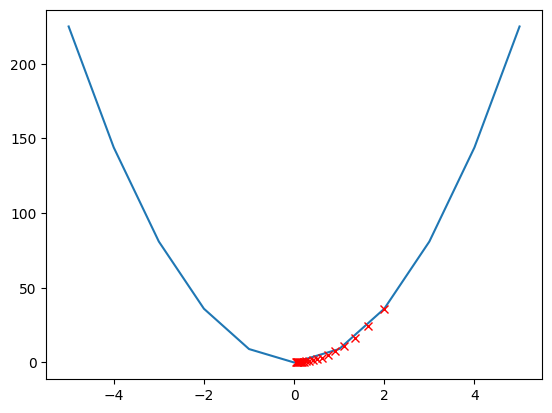

In [34]:
import matplotlib.pyplot as plt

w = 9
lr = 0.01
param = [a for a in range(-5, 6)]
loss = [w * (b * b) for b in range(-5, 6)]

plt.plot(param, loss) # 전체 값의 그래프

p_param = torch.tensor(2.0)

for i in range(20):
    p_param.requires_grad = True # param에 대한 연산을 track
    p_loss = w * (p_param * p_param) # loss를 계산한다(계산식은 여러가지)
    plt.plot(float(p_param), float(p_loss), 'rx') 
    p_loss.backward() # loss에 대한 param의 기울기를 구한다
    grad = p_param.grad
    print(grad)
    with torch.no_grad():
        p_param = p_param - grad * lr # 기울기의 반대쪽으로 lr만큼 이동한다. pytorch에서 이 과정은 optimizer가 담당한다. 